In [70]:
%matplotlib inline

import matplotlib
import pandas as pd

In [75]:


data = pd.read_csv("tidy.csv", parse_dates=[6])
data = data.drop("Unnamed: 0", 1)
data.head(7)


,browser,clientAddress,event,other,recordingId,t
0,NaN,127.0.0.1:55866,state,"state,view,Timeline",2015-07-16T194059_496Z_4035,2015-07-16 19:41:02.644
1,NaN,127.0.0.1:55866,state,"state,day,1",2015-07-16T194059_496Z_4035,2015-07-16 19:41:02.644
2,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_5)...,127.0.0.1:55866,scroll,"14,3,0",2015-07-16T194059_496Z_4035,2015-07-16 19:41:19.937
3,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_5)...,127.0.0.1:55866,scroll,"14,17,0",2015-07-16T194059_496Z_4035,2015-07-16 19:41:19.973
4,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_5)...,127.0.0.1:55866,scroll,"14,42,0",2015-07-16T194059_496Z_4035,2015-07-16 19:41:19.990
5,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_5)...,127.0.0.1:55866,scroll,"14,58,0",2015-07-16T194059_496Z_4035,2015-07-16 19:41:20.008
6,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_5)...,127.0.0.1:55866,scroll,"14,98,0",2015-07-16T194059_496Z_4035,2015-07-16 19:41:20.024
7,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_5)...,127.0.0.1:55866,scroll,"14,274,0",2015-07-16T194059_496Z_4035,2015-07-16 19:41:20.141
8,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_5)...,127.0.0.1:55866,scroll,"14,369,0",2015-07-16T194059_496Z_4035,2015-07-16 19:41:20.242
9,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_5)...,127.0.0.1:55866,scroll,"14,418,0",2015-07-16T194059_496Z_4035,2015-07-16 19:41:20.325


,event,other,recordingId,t
0,state,"state,view,Timeline",2015-07-16T194059_496Z_4035,2015-07-16 19:41:02.644
1,state,"state,day,1",2015-07-16T194059_496Z_4035,2015-07-16 19:41:02.644
2,scroll,"14,3,0",2015-07-16T194059_496Z_4035,2015-07-16 19:41:19.937
3,scroll,"14,17,0",2015-07-16T194059_496Z_4035,2015-07-16 19:41:19.973
4,scroll,"14,42,0",2015-07-16T194059_496Z_4035,2015-07-16 19:41:19.990
5,scroll,"14,58,0",2015-07-16T194059_496Z_4035,2015-07-16 19:41:20.008
6,scroll,"14,98,0",2015-07-16T194059_496Z_4035,2015-07-16 19:41:20.024
7,scroll,"14,274,0",2015-07-16T194059_496Z_4035,2015-07-16 19:41:20.141
8,scroll,"14,369,0",2015-07-16T194059_496Z_4035,2015-07-16 19:41:20.242
9,scroll,"14,418,0",2015-07-16T194059_496Z_4035,2015-07-16 19:41:20.325


In [48]:
data.head()


event                  object
other                  object
recordingId            object
t              datetime64[ns]
dtype: object

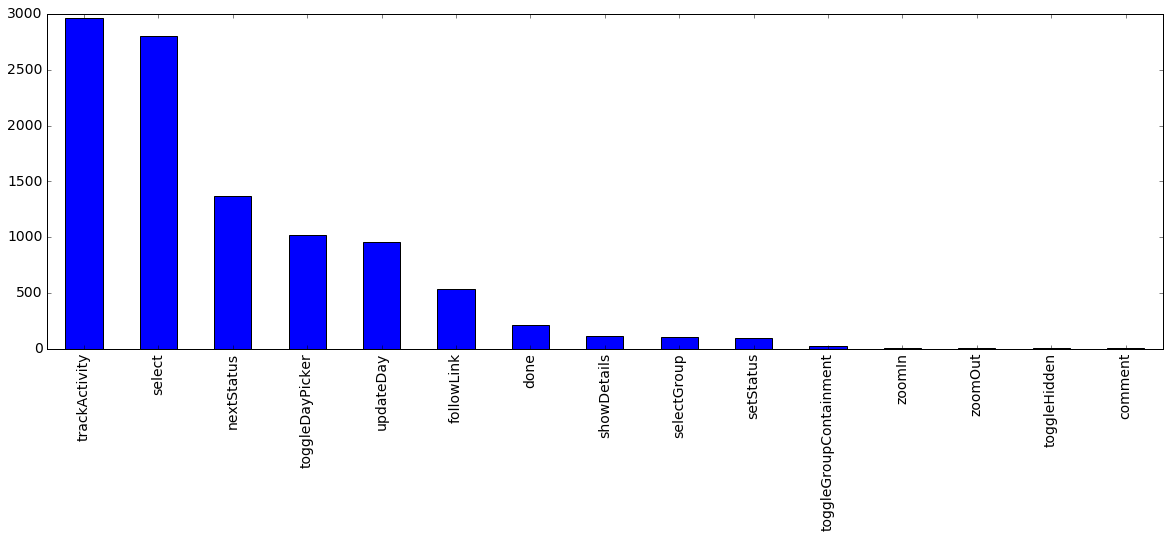

In [80]:
clicks = pd.DataFrame(data[(data.event == "tap") | (data.event == "click") ])
clicks["function"] = clicks["other"].apply(lambda s: s.split(",")[0])
clicks["date"] = clicks.t.apply(lambda t: t.date())

clicks.function.value_counts().plot(kind="bar")

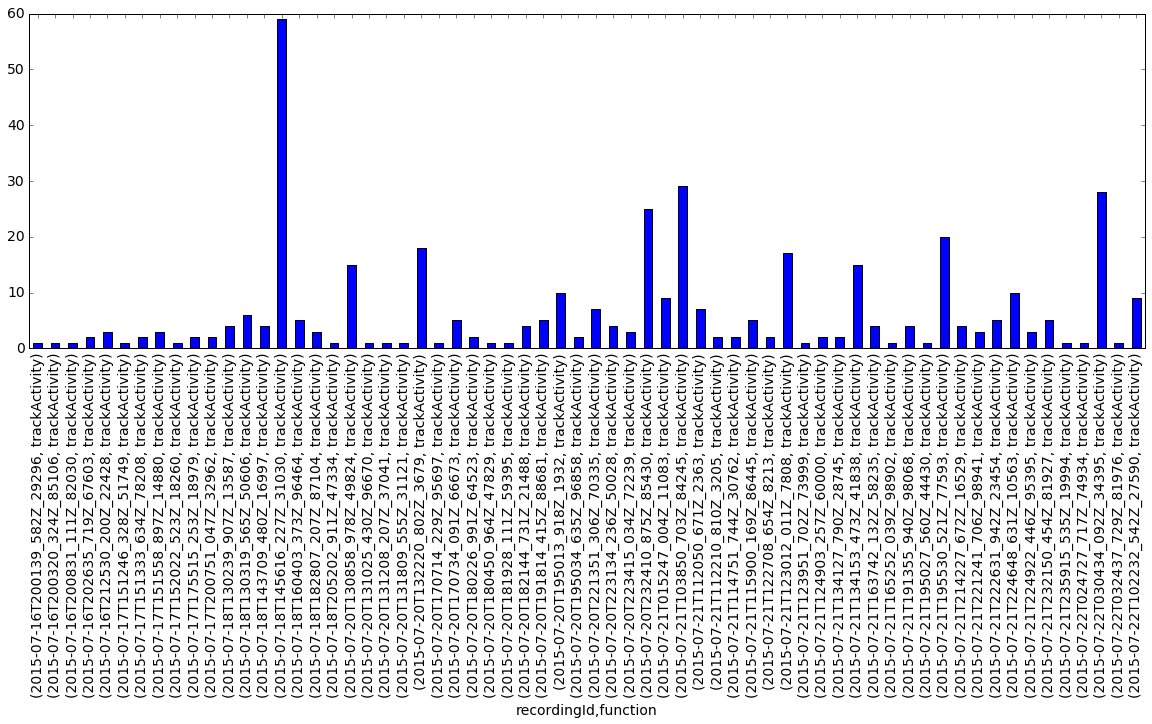

In [92]:
matplotlib.rcParams['figure.figsize'] = (20, 6)
matplotlib.rcParams['font.size'] = 14
clicks[clicks.function=="trackActivity"][0:400].groupby("recordingId").function.value_counts().plot(kind="bar")

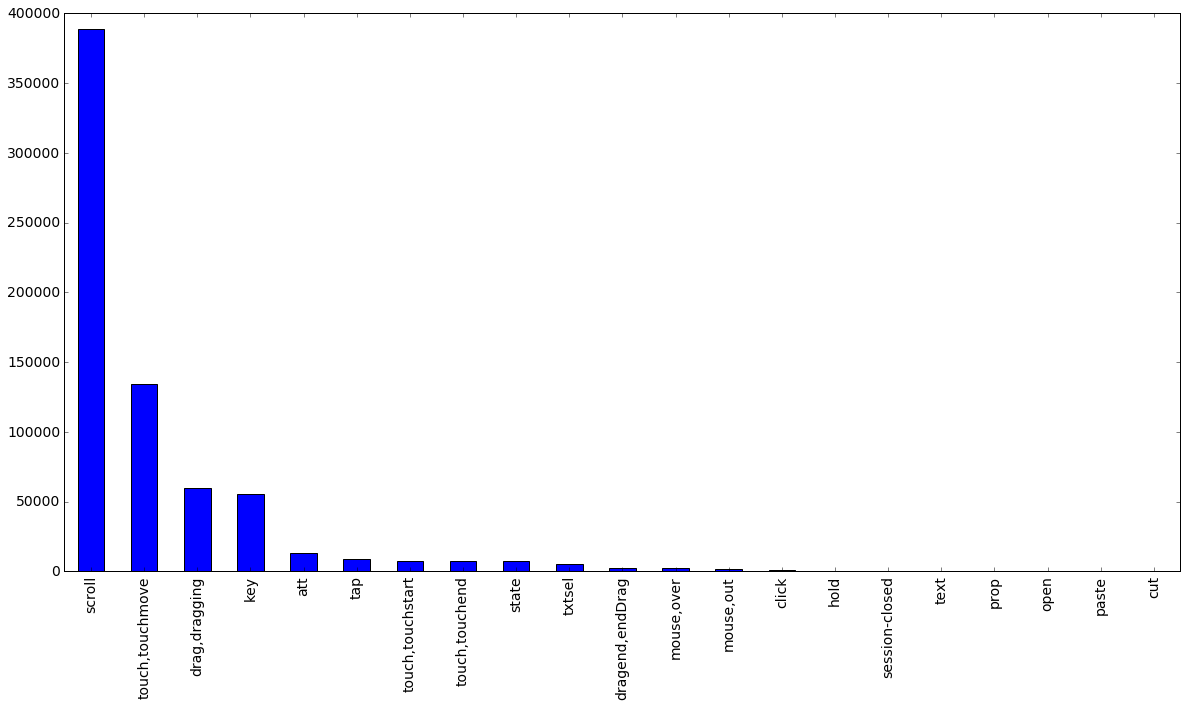

In [78]:
matplotlib.rcParams['figure.figsize'] = (20, 10)
matplotlib.rcParams['font.size'] = 14
data.event.value_counts().plot(kind="bar")

In [28]:
data.event.value_counts()


scroll              388849
touch,touchmove     134422
drag,dragging        60041
key                  55069
att                  13334
tap                   9003
touch,touchstart      7420
touch,touchend        7397
state                 7178
txtsel                5237
dragend,endDrag       2445
mouse,over            2144
mouse,out             1906
click                 1215
hold                   414
session-closed         411
text                   325
prop                   158
open                    34
paste                   18
cut                      1
Name: event, dtype: int64

In [66]:
clicks.head()

,event,other,recordingId,t,function,date
11,click,"select,v0,141",2015-07-16T194059_496Z_4035,2015-07-16 19:41:23.155,select,2015-07-16
26,click,"select,v0,139",2015-07-16T194059_496Z_4035,2015-07-16 19:41:26.158,select,2015-07-16
37,click,"toggleDayPicker,v6,13",2015-07-16T194059_496Z_4035,2015-07-16 19:41:27.628,toggleDayPicker,2015-07-16
40,click,"updateDay,v1,1377",2015-07-16T194059_496Z_4035,2015-07-16 19:41:28.262,updateDay,2015-07-16
68,click,"toggleDayPicker,v6,13",2015-07-16T194059_496Z_4035,2015-07-16 19:41:34.348,toggleDayPicker,2015-07-16


In [44]:
#for index, row in df.iterrows():
 #   print row.other


,event,other,recordingId,t
26951,text,"v0,895,'FE3','EV crew will start suiting up in...",2015-07-20T182144_731Z_21488,2015-07-20 18:26:20.676
28394,text,"v0,166,'FE3','Hating standby diver. EVA crew a...",2015-07-20T183156_281Z_39317,2015-07-20 18:37:44.640
28483,text,"v0,166,'FE3','Copy MD1 14:37:44. That\'s hatt...",2015-07-20T183156_281Z_39317,2015-07-20 18:40:25.168
28549,text,"v0,166,'FE3','Both divers have egressed for S/...",2015-07-20T191108_640Z_89252,2015-07-20 19:12:12.077
29371,text,"v0,2590,'FE3','PET start at 15:13. We\'re 1 ho...",2015-07-20T191814_415Z_88681,2015-07-20 19:21:43.418
29674,text,"v0,4636,'FE3','Copy MD1 15:32:02. We\'re stil...",2015-07-20T191814_415Z_88681,2015-07-20 19:33:00.477
30240,text,"v0,1343,'FE2','Thanks Toshi-san for the messa...",2015-07-20T192720_398Z_8402,2015-07-20 19:40:03.053
30602,text,"v0,1844,'FE3','EV crew will ingress in 15 min. '",2015-07-20T195013_918Z_1932,2015-07-20 19:59:01.208
32258,text,"v0,3284,'FE3','We\'ll need to push DPC back by...",2015-07-20T195013_918Z_1932,2015-07-20 20:21:50.550
32434,text,"v0,5474,'FE3','Are we still doing any sort of ...",2015-07-20T195013_918Z_1932,2015-07-20 22:35:34.691
